In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('LGD.csv')

In [3]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ac_No                15290 non-null  int64  
 1   Age                  15290 non-null  int64  
 2   Years of Experience  15290 non-null  int64  
 3   Number of Vehicles   15290 non-null  int64  
 4   Gender               15290 non-null  object 
 5   Married              15290 non-null  object 
 6   Losses in Thousands  15290 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.3+ KB


In [5]:
pd.pivot_table(df,index=['Gender','Married'],aggfunc=sum)

Ac_No     Age  Losses in Thousands  Number of Vehicles  \
Gender Married                                                               
F      Married  594048427  167213         1.152609e+06                9887   
       Single   567488858  159950         1.510104e+06                9457   
M      Married  572641803  161624         1.367092e+06                9469   
       Single   558736671  158412         1.931150e+06                9349   

                Years of Experience  
Gender Married                       
F      Married                93128  
       Single                 89723  
M      Married                90899  
       Single                 89126

In [6]:
pd.crosstab(df.Gender,df.Married)

Married,Married,Single
Gender,,
F,3974,3773
M,3809,3734


C:\Users\sahil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Losses in Thousands', ylabel='Density'>

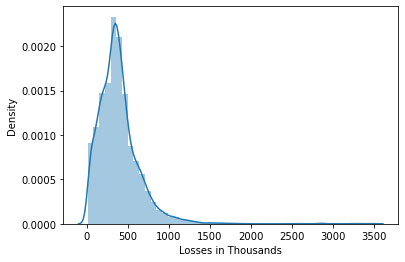

In [7]:
sns.distplot(df['Losses in Thousands'])

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years of Experience', ylabel='Density'>

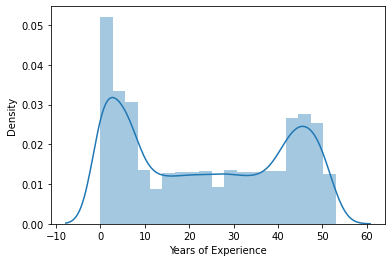

In [8]:
sns.distplot(df['Years of Experience'])

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

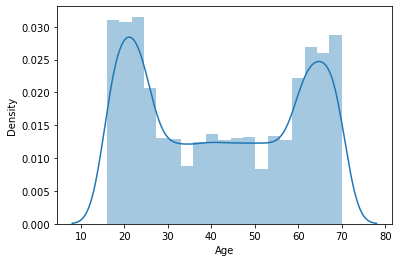

In [9]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Married', ylabel='Losses in Thousands'>

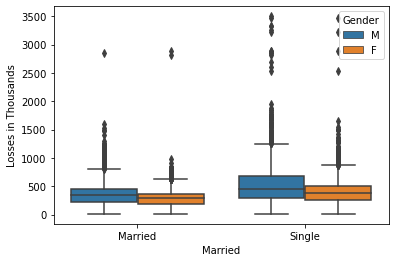

In [10]:
sns.boxplot(x='Married',y='Losses in Thousands',data=df,hue='Gender')

<AxesSubplot:>

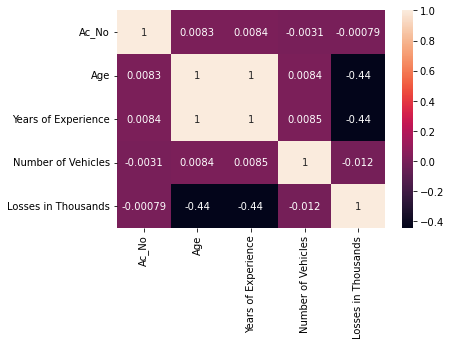

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
df.isna().sum()

Ac_No                  0
Age                    0
Years of Experience    0
Number of Vehicles     0
Gender                 0
Married                0
Losses in Thousands    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ac_No                15290 non-null  int64  
 1   Age                  15290 non-null  int64  
 2   Years of Experience  15290 non-null  int64  
 3   Number of Vehicles   15290 non-null  int64  
 4   Gender               15290 non-null  object 
 5   Married              15290 non-null  object 
 6   Losses in Thousands  15290 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.3+ KB


In [16]:
dp=pd.get_dummies(df,drop_first=True)

In [17]:
dp.sample(5)

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
7592,108853,44,26,2,347.673512,0,1
9274,168100,24,6,3,304.259145,0,0
14042,143483,59,42,4,454.958553,1,1
7831,108988,19,0,3,154.199217,0,0
10307,155842,28,11,3,446.088762,1,1


In [18]:
x=dp.drop(['Years of Experience','Losses in Thousands','Ac_No'],axis=1)
y=dp['Losses in Thousands']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [20]:
model=LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.score(x_test,y_test)

0.31125481302408486

In [24]:
model.score(x_train,y_train)

0.2974596410740785

In [25]:
pred=model.predict(x_test)

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [27]:
metrics.mean_absolute_error(y_test,pred)

147.5354380626643

In [28]:
r2_score(y_test, pred)

0.31125481302408486